In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

In [4]:
df = load_iris()
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
data = pd.DataFrame(df.data, columns=df.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data['target']=df.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
data['flour_name'] = data.target.apply(lambda x : df.target_names[x])
print(data.columns)
print( 'la taille du dataset est :' ,data.shape)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flour_name'],
      dtype='object')
la taille du dataset est : (150, 6)


In [38]:
df0 = data[data.target == 0]
df1 = data[data.target == 1]
df2 = data[data.target == 2]

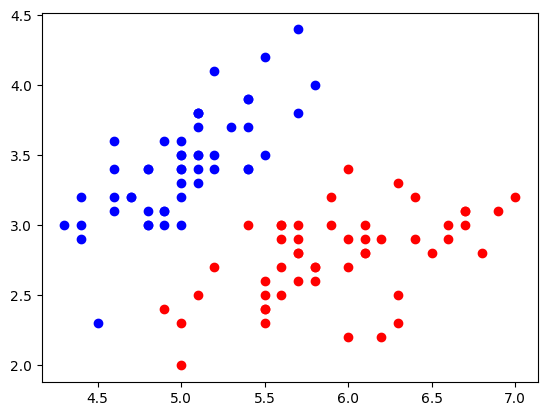

In [28]:
X = data.drop(['target', 'flour_name'], axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(y_test)

30

In [24]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
svm.score(X_test, y_test)

0.9666666666666667

<Axes: >

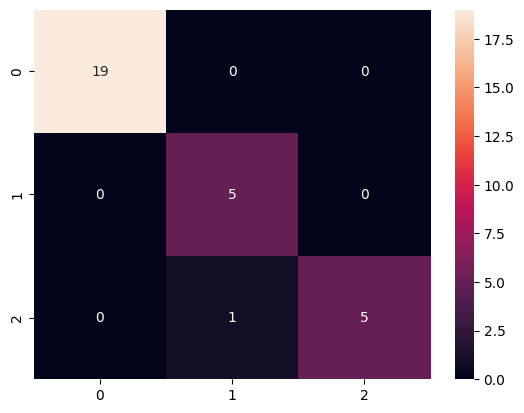

In [27]:
y_pred = svm.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [29]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

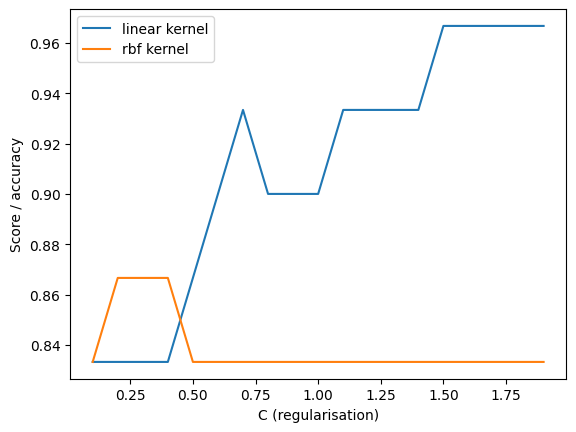

In [45]:
score_linear = []
score_rbf = []
a = [i for i in range(1, 20, 1)]
c_list = [x/10 for x in a ]
kernels = ['linear', 'rbf']

for ker in kernels :
    if ker==kernels[0]:
        for c in c_list:
            svc = SVC(kernel=ker, C=c)
            svc.fit(X_train, y_train)
            score_linear.append(svc.score(X_test, y_test)) 
    else:
        for c in c_list:
            svc = SVC(kernel=ker, C=c)
            svc.fit(X_train, y_train)
            score_rbf.append(svc.score(X_test, y_test))
            
plt.plot(c_list, score_linear, label='linear kernel')
plt.plot(c_list, score_rbf, label='rbf kernel')
plt.xlabel('C (regularisation)')
plt.ylabel('Score / accuracy')
plt.legend()
        

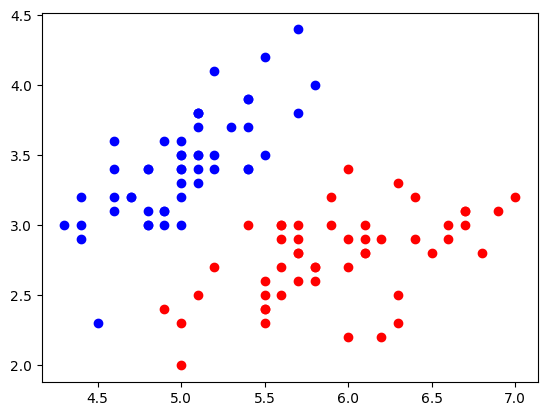

In [36]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red')

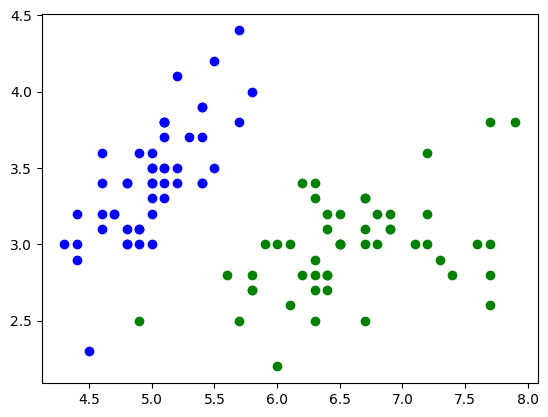

In [39]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='green')

In [ ]:
'''

'''